In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size':12}) 


In [2]:
data = pd.read_csv('./data/C2_Ohms_Fitting.csv')

# Functions and line fitting


## Overview

```{admonition} Questions
:class: questions
- How do you add a best fit line?
- What is it actually doing?
```

```{admonition} Objectives
:class: objectives
- Fit a best fit line with `scipy`
- Add the line to the plot
- Adding a legend
```

## Defining functions

You've already used lots of functions from the `numpy` and `matplotlib` packages. Now it's time to write our own!

A function is basically a mini-program. It's a little bit of code that you can use again and again. We've already been sort of doing that by copying and pasting old bits of our code into new cells, but now we won't even need to copy and paste.

Functions can be simple things that don't need input, like the one in the cell below:

In [3]:
def howdy():
    print("howdy!")
    return
    

In [4]:
howdy()

howdy!


We define a function using `def`. In the `howdy` function above, the brackets after the function name are empty, because it doesn't need any input. We have a colon after the brackets to tell python that the next lines are part of the function.

Inside the function we just have `print("howdy!")`. Every time we run the function, this is exactly what it will do.

Finally, we have a `return` statement. We don't need this function to return anything, we just want it to print `howdy!` then stop. 

Basically, I've written a pretty useless function. But we can make our functions do stuff by giving them input.


```{image} images/johnny_5.jpeg
:alt: Jonny 5 needs input
:width: 500px
:align: center
```

We're now going to change our `howdy()` function to take some input

In [5]:
def howdy(name):
    print("howdy, {}!".format(name))
    return

I've told the function to expect a some input, and to add that input to what's printed on the screen. Change your function in the same way and run the `howdy` function in a new cell. For the input, you can either directly pass it a string (like in the cell below), or you can create a variable that contains a string and pass it that. 

In [6]:
howdy("Vicky")

howdy, Vicky!


In [7]:
name = "Johnny 5"

In [8]:
howdy(name)

howdy, Johnny 5!


You'll also see that there are curly brackets in the `print` function, and there's some extra text afterwards: the `.format()` call. 

`format()` is used to format our output. We'll look in more detail at this later. For now, remember that if you want to put a variable in a `print` statement use the curly brackets to show where it will go, and `.format()` to tell it which variable you want. 

This is still a pretty useless function though. What it really needs is some output.

In [9]:
def howdy(name):
    print("howdy, {}!".format(name))
    letters = len(name)
    print("There are {} letters in your name".format(letters))
    return(letters)

In [10]:
howdy(name)

howdy, Johnny 5!
There are 8 letters in your name


8

Here I've added something to count the number of letters in `name`. The function also **returns** that value. That's why you see an `Out[ ]` box now too. The `8` is the value that was returned. 

If we really wanted to, we could save that in a variable too:

In [11]:
n_letters = howdy(name)

howdy, Johnny 5!
There are 8 letters in your name


In [12]:
n_letters

8

## Useful functions

Now we have an idea of how functions work, we can write a function that does something useful. We're going to add a line of best fit to our plot. We can get a least-squares fit to our data using `curve_fit`.


First we set up the function that we want to fit to our data:
```python 
def line(x, slope, intercept):          
    return slope*x + intercept
```

Here we're giving it 3 things as input: 

- `x` is our $x$ value
- `slope` is the slope of the line
- `intercept` is the intercept

The return value (the output) is

$$ y = m x + c $$

where $m$ is the slope and $c$ is the intercept.

In [13]:
def line(x, slope, intercept):         
    return slope*x + intercept         

While we could write some code to calculate the values of the slope and intercept using least-squares fitting, we don't need to. Some kind soul has already done this for us as part of the `scipy` package. The `curve_fit` function is the one we need. 

To import it, run

```python
from scipy.optimize import curve_fit
```

Next we pass our function and the x and y data to `curve_fit`:
```python
popt, pcov = curve_fit(line,data['V'],data['I_mA'])
```
This will find the best fit line to our voltage and current data and send the parameters to the `popt` and `pcov` variables.

````{admonition} popt, pcov
:class: myinfo
`popt` and `pcov` are arrays that contain information about our fit. 

In the example here we're fitting a line of the form

$$ y = m x + c $$

`popt` is a 1-dimensional array that contains the values of $m$ and $c$:

```python
popt = [m, c]
```
where `m` is the slope and `c` is the intercept. We access these values the same way we learned in C3 - by slicing the arrays:

```python
slope = popt[0]
intercept = popt[1]
```

`pcov` is a 2-dimensional array that represents the **covariance matrix** of our fit. 

$$ \text{cov}[m, c] = \begin{bmatrix}
\sigma^2_m & \sigma_{m,c}\\
\sigma_{c,m} & \sigma^2_c 
\end{bmatrix}
$$

where $\sigma^2_m$ and $\sigma^2_c$ are the variances of the fitted parameters and $\sigma_{m,c}$ and $\sigma_{c,m}$ are the covariances. We're not going to use the covariances in this course. The only parts we need are the **variances**. 

Variance is simply the standard error squared. To get the uncertainties on $m$ and $c$, we simply slice the array to get the diagonal elements and square root them:

```python
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))
```
````

In [14]:
popt, pcov = curve_fit(line,data['V'],data['I_mA'])
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

We can print the parameters and their uncertainties to the screen using `print`

In [15]:
print('Slope: {0:.3f} +- {1:.3f}'.format(slope, err_slope))
print('Intercept: {0:.3f} +- {1:.3f}'.format(intercept, err_intercept))

Slope: 9.247 +- 0.297
Intercept: 4.719 +- 1.734


## Final plot

We can now add the best fit line to the plot.

As this plot will have more than just the data on it we should include a legend describing what's being shown. We can also add the equation of the line to the figure so everything is self-contained within one file.

In the example below we now use the `label` keyword in `ax.errorbar`. `label` specifies the text that will be used on the legend for the things you're plotting.

The best fit line is added using `ax.plot`. The `x` values are the `x` values of the data (i.e. the distances). The `y` values are the value of the best fit line equation at each point. 

We add the legend using two lines of code:

```python
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
```
The first line grabs the `handles` - the plotting sybols - and the `labels` for each thing we've added to the plot.
The second line adds the legend.

When adding the legend, we reverse the order of the `handles` and `labels` using `handles[::-1]`. This makes it so the thing we plotted first is at the top of the legend.

**This is why you learned how to reverse things!**

`loc=0` tells `legend` to pick the best position to draw the legend. You can read more details about legends [here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html)

Finally, we add the best fit line equation to the plot using `annotate`:
```python
annotation ='$I = {0:.3f} ( \pm {1:.3f})V {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(70, 1), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
```

The `annotation` line defines the text that we want to print. Here we can control the format of the text. Now we're using more than one variable in the format statement we use numbers in the curly brackets so it's easier to see which variable goes where. The `:.3f` inside the brackets tell python we want to print the variables as `float`s with 3 decimal places. 

Details of the Python formatting syntax are [here](https://docs.python.org/3/library/string.html#format-specification-mini-language). You can use latex to add maths symbols to your text. 

The `annotate` line specifies where and how the annotation is placed. 

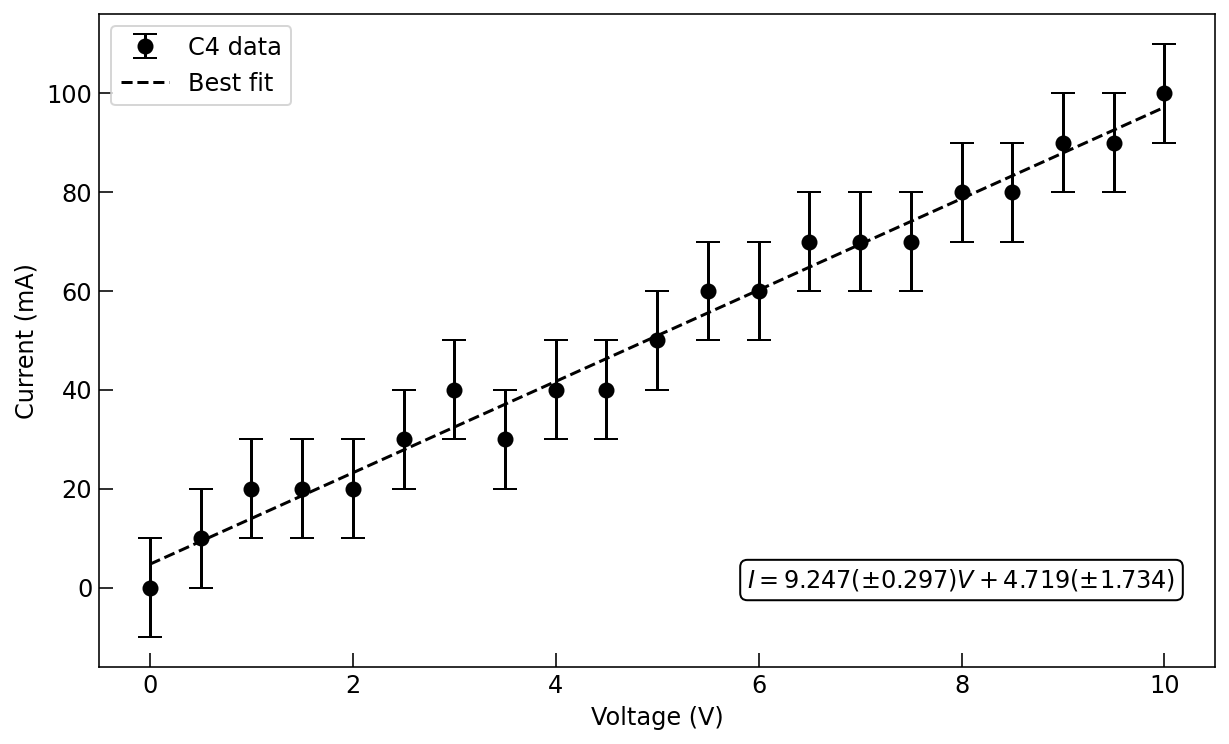

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['V'],           
             data['I_mA'],              
             yerr=data['I_unc_mA'],     
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "C2 data"
             )

ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')

ax.tick_params(direction='in',      
                length=7,           
               )
ax.plot(data['V'], data['V']*slope+intercept, 
         linestyle='--',
         color='black',
         label='Best fit')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
annotation ='$I = {0:.3f} ( \pm {1:.3f})V {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(8, 0), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.show()

```{admonition} Equations on plots
:class: myinfo

When you're making plots that could be thought of as 'working drafts' it's fine to include the equation on the plot. However,  if you're making a figure to put in a report, don't add the equation like we have here. It's only here to get you practice in formatting output. 
```

(ex-ohms-law)=
```{admonition} Exercise: Ohms law
:class: practice

Voltage, current and resistance are related by Ohms law: 

$$ V = IR$$

The function you used above has the form

$$ I = m V + c $$

where $m$ is the slope, $c$ is the intercept, and $I$ has units of milli-amps.

Use the results from your fitting function to calculate the value of R and it's uncertainty. You may have to review the material from the statistics part of the skills unit to remind yourself about how to propagate uncertainties. 

Use a markdown cell to properly format your answer with its uncertainty and units.


[solution](soln_ohms_law.ipynb)

## Key Points
- Functions are most useful with input and output
- Use `curve_fit` to fit a line of best fit to your data.
- Use `.format()` to format text on plots.
- All results need units and uncertainties. If it doesn't have these, it's meaningless. 